# AI Agent Playing QisCoin v0

In this notebook we load a simple version of **QisCoin** (*qiscoin-v0*) in which a quantum circuit with a single random gate is generated. We instantiate and run a random agent and few RL agents from the stable-baselines library and we observe their results.

### Importing libraries

We start importing the main required libraries: OpenAI *gym* to run the game; *IPython.display* to print out our circuits.  

In [1]:
import gym

from IPython.display import display

### Importing gym-qiscoin

Next, we import the version of **QisCoin** wrapped into the *gym* interface. The code for this version of the game is available [here](https://github.uio.no/fabiomz/gym-qiscoin) and it can be installed as explained in the notebook [Setup](https://github.com/avalds/QisCoin/blob/master/1-%20Setup.ipynb).

This version of **QisCoin** implements a game environment that inherits from the *OpenAI gym* **Env** class. It implements four main methods: *__init__()* for setting up the game; *step()* computing the result of a single time-step of evolution of the environment; *reset()* restarting the game; *render()* displaying the game.

The **QisCoin** game has been modeled with a *discrete state space* (an integer number between 0 and 5 identifies which of the six possible gates has been randomly added on the circuit) and a *discrete action space* (the two integer numbers 0 and 1 corresponds to the possible guesses of the agent). Since the game is fully observed, the state space corresponds to the observation space. A positive reward (+1) is returned for guessing correctly, a negative reward (-1) is returned for guessing wrong.

The code is available in the source file: https://github.uio.no/fabiomz/gym-qiscoin

In [2]:
import qiscoin

### Loading the game
We create the game enviroment:

In [3]:
env = gym.make('qiscoin-v0')

And then we test the game running a single iteration of the game where the AI agent takes a random guess:

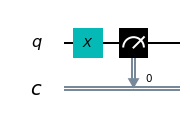

AI is guessing that the outcome will be 1
The guess is correct!


In [4]:
env.reset()
display(env.render())

for _ in range(1):
    guess = env.action_space.sample()
    print("AI is guessing that the outcome will be {0}".format(guess))
    obs, reward, done, info = env.step(guess)
    if(reward==1):
        print("The guess is correct!")
    else:
        print("The guess is wrong!")
        
env.close()

### Training a Reinforcement Learning Agent

Running a random agent playing **QisCoin** is not particularly interesting. We then turn to loading and running reinforcement learning agents that, starting from a random policy, would be able to learn to play **QisCoin** in a sensible way. To do so, we rely on the library of agents provided by stable-baselines.

More information and examples on stable-baselines: https://github.com/hill-a/stable-baselines

### Training a PPO2 Agent

We consider instanting and training a PPO2 agent.

More information on the PPO2 agent: https://stable-baselines.readthedocs.io/en/v2.3.0/modules/ppo2.html

First of all we import the required modules: *DummyVecEnv* providing a wrapper for our environment as required by stable-baselines; *MlpPolicy* specifying a policy for our agent; *PPO2* implementing the actual agent.

In [5]:
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO2

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



We then vectorize our environment (this is a formal step required for the agent to be able to play the game), we instantiate the PPO2 model, and we train it by playing 10000 games of **QisCoin**.

In [6]:
env = DummyVecEnv([lambda: env])
PPO2model = PPO2(MlpPolicy, env, verbose=1)
PPO2model.learn(total_timesteps=10000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



-------------------------------------
| approxkl           | 6.935479e-05 |
| clipfrac           | 0.0          |
| explained_variance | -0.0725      |
| fps                | 135          |
| n_updates          | 1            |
| policy_entropy     | 0.6930742    |
| policy_loss        | -0.008390352 |
| serial_timesteps   | 128          |
| time_elapsed       | 2.62e-06     |
| total_timesteps    | 128          |
| value_loss         | 0.5348885    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00013550652 |
| clipfrac           | 0.0           |
| explained_variance | -0.021        |
| fps                | 154           |
| n_updates          | 2             |
| policy_entropy     | 0.6924768  

-------------------------------------
| approxkl           | 0.0019015888 |
| clipfrac           | 0.029296875  |
| explained_variance | 0.0747       |
| fps                | 181          |
| n_updates          | 10           |
| policy_entropy     | 0.4334612    |
| policy_loss        | -0.035162725 |
| serial_timesteps   | 1280         |
| time_elapsed       | 6.9          |
| total_timesteps    | 1280         |
| value_loss         | 0.30663377   |
-------------------------------------
-------------------------------------
| approxkl           | 0.0023028697 |
| clipfrac           | 0.037109375  |
| explained_variance | 0.00321      |
| fps                | 188          |
| n_updates          | 11           |
| policy_entropy     | 0.36602375   |
| policy_loss        | -0.04176493  |
| serial_timesteps   | 1408         |
| time_elapsed       | 7.61         |
| total_timesteps    | 1408         |
| value_loss         | 0.3007572    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 3.742303e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.478         |
| fps                | 183           |
| n_updates          | 27            |
| policy_entropy     | 0.14685893    |
| policy_loss        | -7.811177e-05 |
| serial_timesteps   | 3456          |
| time_elapsed       | 18.3          |
| total_timesteps    | 3456          |
| value_loss         | 0.10202525    |
--------------------------------------
--------------------------------------
| approxkl           | 1.2415462e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.28          |
| fps                | 193           |
| n_updates          | 28            |
| policy_entropy     | 0.1269525     |
| policy_loss        | 0.00029859878 |
| serial_timesteps   | 3584          |
| time_elapsed       | 19            |
| total_timesteps    | 3584          |
| value_loss         | 0.08397887    |
-------------------------

--------------------------------------
| approxkl           | 3.4316952e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.354         |
| fps                | 176           |
| n_updates          | 44            |
| policy_entropy     | 0.027325513   |
| policy_loss        | -0.0024129478 |
| serial_timesteps   | 5632          |
| time_elapsed       | 30.7          |
| total_timesteps    | 5632          |
| value_loss         | 0.058310937   |
--------------------------------------
--------------------------------------
| approxkl           | 3.795249e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.424         |
| fps                | 186           |
| n_updates          | 45            |
| policy_entropy     | 0.03447568    |
| policy_loss        | -0.0014892403 |
| serial_timesteps   | 5760          |
| time_elapsed       | 31.5          |
| total_timesteps    | 5760          |
| value_loss         | 0.06682341    |
-------------------------

--------------------------------------
| approxkl           | 6.668204e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.539         |
| fps                | 141           |
| n_updates          | 61            |
| policy_entropy     | 0.03957184    |
| policy_loss        | -0.0017030494 |
| serial_timesteps   | 7808          |
| time_elapsed       | 45.8          |
| total_timesteps    | 7808          |
| value_loss         | 0.0539545     |
--------------------------------------
--------------------------------------
| approxkl           | 9.452124e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.421         |
| fps                | 165           |
| n_updates          | 62            |
| policy_entropy     | 0.05058552    |
| policy_loss        | -0.0025506634 |
| serial_timesteps   | 7936          |
| time_elapsed       | 46.8          |
| total_timesteps    | 7936          |
| value_loss         | 0.09105356    |
-------------------------

--------------------------------------
| approxkl           | 6.313466e-05  |
| clipfrac           | 0.001953125   |
| explained_variance | -0.0731       |
| fps                | 186           |
| n_updates          | 78            |
| policy_entropy     | 0.023529831   |
| policy_loss        | -0.0021195642 |
| serial_timesteps   | 9984          |
| time_elapsed       | 58.2          |
| total_timesteps    | 9984          |
| value_loss         | 0.061529253   |
--------------------------------------


Finally, we save our model to be able to use it later.

In [7]:
PPO2model.save('models/PPO2-qiscoin-v0-10k')

### Training a A2C agent
For the sake of comparison, we also train a A2C agent.

More information on the A2C agent: https://stable-baselines.readthedocs.io/en/v2.3.0/modules/a2c.html

As before, we import the module for the *A2C* agent, we set up the agent, train it on 10000 games of **QisCoin** and save the trained model.

In [8]:
from stable_baselines import A2C

In [9]:
A2Cmodel = A2C(MlpPolicy, env, verbose=1)
A2Cmodel.learn(total_timesteps=10000)




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
---------------------------------
| explained_variance | -0.0413  |
| fps                | 25       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | 0.047    |
| fps                | 147      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 1        |
---------------------------------
---------------------------------
| explained_variance | -0.0498  |
| fps                | 155      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 1.08     |
---------------------------------
---------------------------------
| explained_variance | 0.163 

In [10]:
A2Cmodel.save('models/A2C-qiscoin-v0-10k')

### Comparing the agents
We now compare and evalute the agents. 

First of all, we import the module *evaluation.py* to run an evaluation functions on our agents. The module provides simple functions that run a number of iteration of the **QisCoin** game (default: 1000 games) and returns the average reward collected. The source of all these evaluation functions is available in *evaluation.py*.

In [11]:
import evaluation as ev

We start running and evaluating the simple starting agent:

In [12]:
mean_reward, _ = ev.evaluate_random(gym.make('qiscoin-v0'), num_steps=1000)
print('Mean reward: {0}'.format(mean_reward))

Mean reward: -0.0


The average reward is $0$. The result makes sense since the agent has $50\%$ probability of guessing right at each iteration, and thus, in the long run, the positive reward for guessing right ($+1$) compensate the negative reward for guessing wrong ($-1$).

Next we test a biased agent that constantly guesses $0$.

In [13]:
mean_reward, _ = ev.evaluate_biased(gym.make('qiscoin-v0'), num_steps=1000)
print('Mean reward: {0}'.format(mean_reward))

Mean reward: 0.5


The average reward of a biased agent always guessing 0 is much better than the random agent. This is due to the fact that 4 out of the 6 gates (*id, reset, t, tdg*) deterministically return 0, 1 of them (*x*) deterministically return 1, while the last one (*h*) may return 0 or 1 with the same probability. Given that the gates are selected with uniform probability, the biased agent is expect to be correct on $4.5 * \frac{100}{6} = 75\%$ of times, and be wrong on $1.5 * \frac{100}{6} = 25\%$ of times. Thus the expected reward can be estimated as:
\begin{equation}
0.75 * 1 + 0.25 * -1 = 0.5.
\end{equation}

Finally, we get to test the two agents we trained.

In [14]:
mean_reward, _ = ev.evaluate_model(PPO2model, env, num_steps=1000)
print('Mean reward: {0}'.format(mean_reward))

Mean reward: 0.8


In [15]:
mean_reward, _ = ev.evaluate_model(A2Cmodel, env, num_steps=1000)
print('Mean reward: {0}'.format(mean_reward))

Mean reward: 0.8


Both agents achieve an average reward of $0.8$. This result represents, in this scenario, an almost perfect performance. 
Remember that in the game there 5 gates ($id, reset, x, t, tdg$) that are deterministic, and 1 gate ($h$) which can produce any of the two outputs with equal probability. A perfect agent would then always guess correctly when presented with a deterministic gate, and guess right on average half of the time when presented with a Hadamard gate. In total a perfect agent should guess correctly $5.5 * \frac{100}{6} \approx 91.6 \%$ of the times, and be wrong $5.5 * \frac{100}{6} \approx 8.3 \%$ of the times. Given that all the gates are equally likely to be selected, we can compute the average reward as:
\begin{equation}
0.916 * 1 + 0.083 * -1 \approx 0.83.
\end{equation}
The performance of the PPO2 and A2C agent is then very close to the theoretical best performance.

### Conclusions

This simple problem resembles more a *contextual n-armed bandit* or even a simpler *supervised learning* problem. It hardly constitute a challenge for the reinforcement learning algorithms that are able to achieve an almost perfect performance. In the next notebook we will consider a more complex instantiation of the game.